From Chris Nho comes a question of rolling (and re-rolling) a die:

You start with a fair 6-sided die and roll it six times, recording the results of each roll. You then write these numbers on the six faces of another, unlabeled fair die. For example, if your six rolls were 3, 5, 3, 6, 1 and 2, then your second die wouldn’t have a 4 on it; instead, it would have two 3s.

Next, you roll this second die six times. You take those six numbers and write them on the faces of yet another fair die, and you continue this process of generating a new die from the previous one.

Eventually, you’ll have a die with the same number on all six faces. What is the average number of rolls it will take to reach this state?

Extra credit: Instead of a standard 6-sided die, suppose you have an N-sided die, whose sides are numbered from 1 to N. What is the average number of rolls it would take until all N sides show the same number?

[link](https://fivethirtyeight.com/features/can-you-get-the-gloves-out-of-the-box/)

In [3]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import matplotlib.ticker as mtick
import seaborn as sns; sns.set(); sns.set_palette("bright")

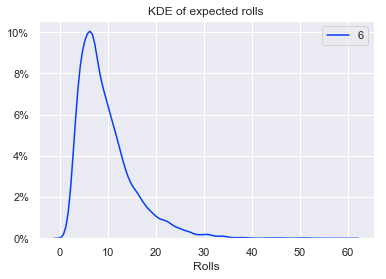

In [8]:
# For case of normal die
tries = 10000
expected = []
die_sides = 6
for i in range(tries):
    roll = np.random.choice(range(1, die_sides+1), die_sides)
    counter = 1
    while len(set(roll)) > 1:
        roll = np.random.choice(roll, die_sides)
        counter += 1
    expected.append(counter)

fig, ax = plt.subplots(1, 1)
sns.kdeplot(expected, ax=ax, label=die_sides)
ax.set_title('KDE of expected rolls')
ax.set_xlabel('Rolls')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.savefig('DiceRewrites_6-sided.png')

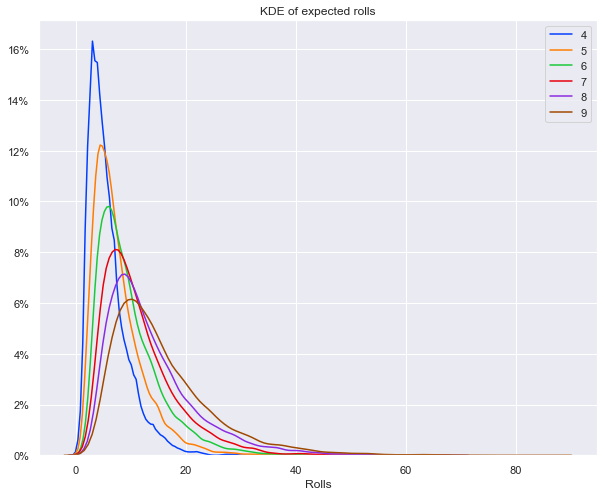

In [7]:
# For many dice
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_title('KDE of expected rolls')
ax.set_xlabel('Rolls')

for die_sides in range(4, 10):
    tries = 10000
    expected = []
    for i in range(tries):
        roll = np.random.choice(range(1, die_sides+1), die_sides)
        counter = 1
        while len(set(roll)) > 1:
            roll = np.random.choice(roll, die_sides)
            counter += 1
        expected.append(counter)
    sns.kdeplot(expected, ax=ax, label=die_sides)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.savefig('DiceRewrites_n-sided.png')